# Data import and overview

In [193]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn.metrics import mean_squared_error as MSE

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv


In [194]:
#importing data and cheking it
data = pd.read_csv('/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv')

In [195]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [197]:
data.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [198]:
data.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


First thoughts
* URL - no use, need to drop
* ID - no use, keep to identify entities
* Name - wordcount? world could?
* Subtitle - no use, need to drop
* Icon URL - no use for first stage, may be later there is an opportunity to download them, classify and transfrom to additional features.
* **Average User Rating** - main KPI, build correlations with it
* **User rating count** - second most important KPI, it shows how many users got involved in this game expirience 
* Price + In-App purchases  - models of monetization?
* Description - no use, need to drop
* Developer - find the most succsesful one
* Age rating - remove '+' sign to transform to numerical feature
* Languages - find most popular language and how many languages in average 1 game have
* Size - transform to Mb and cut into bins
* Genre + Primary Genre - find most popular 
* Release date - transform in order to understand trends and changes over time
* Current version - check if there where any updates

In [199]:
data['Average User Rating'].count() 

7561

In [200]:
data['Average User Rating'].isnull().sum()

9446

We have more then 50% of missing values in Average User Rating column, which gives us two ideas:
1. Users don't like to spend time and give rating to applications, so probably they would give scores only for games that somehow affected them in good or bad way, so we can expect a lot of high and low ratings. We can check it later.
2. Due to large amount of missing values rating is not a good indicator of application success. Another usefull parameter would be number of installations, which could help us to understand better if this application is successful or not and users prefferences in general. Sadly, we dont have this parameter in the dataset. So we will process with Average Rating as key parameter of application success

# Data cleaning and transformation

In [201]:
# droping out unnesessary data, bringing to right type and format (Age rating to numerical, Release date to datetime).
# also removing any duplicated row, based on ID as it is an unique for each application
# Significant problem with Name that for now I cant resolve - it contains some Unicode characters that better to be removed. 
#for example print(data['Name'][700])
data.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)
data = data.drop(['URL', 'Subtitle','Icon URL','Description'], axis=1)
data['Age Rating'] = data['Age Rating'].str.replace('+','')
data['Age Rating'] = pd.to_numeric(data['Age Rating'])
data['Size'] = data['Size']/1024/1024 #size now in MB
data['Size'] = pd.qcut(data['Size'], q=5, labels=False) #splitting Size into 5 equal bins
data['Release_Date'] = pd.to_datetime(data['Original Release Date'], format ='%d/%m/%Y')
data['Current Version Release Date'] = pd.to_datetime(data['Current Version Release Date'], format ='%d/%m/%Y')
data['Release_Year'] = data['Release_Date'].dt.year
data['Release_Month'] = data['Release_Date'].dt.month
data = data.drop(['Original Release Date'], axis = 1)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 0 to 17006
Data columns (total 16 columns):
ID                              16847 non-null int64
Name                            16847 non-null object
Average User Rating             7488 non-null float64
User Rating Count               7488 non-null float64
Price                           16823 non-null float64
In-app Purchases                7615 non-null object
Developer                       16847 non-null object
Age Rating                      16847 non-null int64
Languages                       16787 non-null object
Size                            16846 non-null float64
Primary Genre                   16847 non-null object
Genres                          16847 non-null object
Current Version Release Date    16847 non-null datetime64[ns]
Release_Date                    16847 non-null datetime64[ns]
Release_Year                    16847 non-null int64
Release_Month                   16847 non-null int64
dtypes: dateti

In [203]:
data.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Current Version Release Date,Release_Date,Release_Year,Release_Month
0,284921427,Sudoku,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",0.0,Games,"Games, Strategy, Puzzle",2017-05-30,2008-07-11,2008,7
1,284926400,Reversi,3.5,284.0,1.99,NaN,Kiss The Machine,4,EN,0.0,Games,"Games, Strategy, Board",2018-05-17,2008-07-11,2008,7
2,284946595,Morocco,3.0,8376.0,0.00,NaN,Bayou Games,4,EN,0.0,Games,"Games, Board, Strategy",2017-09-05,2008-07-11,2008,7
3,285755462,Sudoku (Free),3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",1.0,Games,"Games, Strategy, Puzzle",2017-05-30,2008-07-23,2008,7
4,285831220,Senet Deluxe,3.5,28.0,2.99,NaN,RoGame Software,4,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",1.0,Games,"Games, Strategy, Board, Education",2018-07-22,2008-07-18,2008,7


In [204]:
data['Primary Genre'].value_counts()

Games                16135
Education              217
Entertainment          197
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     8
News                     7
Food & Drink             4
Health & Fitness         4
Music                    3
Navigation               3
Medical                  1
Travel                   1
Shopping                 1
Name: Primary Genre, dtype: int64

Unsurprisingly, majority of mobile strategies are made in games genre. Lets dig deeper are see what additional information about genres we can get.

In [205]:
#splitting stings with genres
genres = data['Genres'].str.split(', ')
genres

0                       [Games, Strategy, Puzzle]
1                        [Games, Strategy, Board]
2                        [Games, Board, Strategy]
3                       [Games, Strategy, Puzzle]
4             [Games, Strategy, Board, Education]
                           ...                   
17002    [Games, Entertainment, Casual, Strategy]
17003                   [Games, Family, Strategy]
17004                           [Games, Strategy]
17005                   [Games, Strategy, Action]
17006                   [Games, Strategy, Puzzle]
Name: Genres, Length: 16847, dtype: object

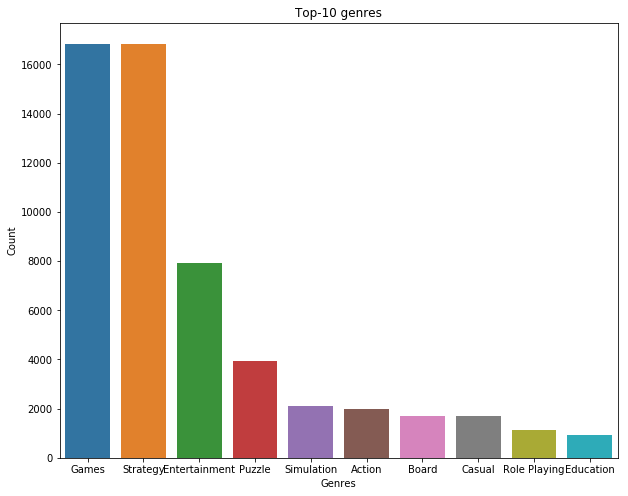

In [206]:
#counting single appearance of genre in a list wih a Python
#from collections import Counter
#list = []
#for i in data['Genres']:
#    for genre in i.split(', '):
#        list.append(genre)
#d = Counter(list)
#df = pd.Series(d).to_frame('Frequency')
#df_sorted = df.sort_values(by='Frequency', ascending=False)
#df_sorted['Prc'] = df_sorted['Frequency'] / df_sorted['Frequency'].sum()
#df_sorted


#doing the same with Pandas functionality
Genres = pd.DataFrame(data['Genres'].str.split(', ',expand=True))
Genres = pd.DataFrame(Genres.values.ravel(), columns = ["Genres"])
Genres = pd.DataFrame(Genres['Genres'].value_counts().reset_index())
Genres.columns = ['Genres', 'Count']
#plottring top-10 genres
plt.figure(figsize=(10,8))
sns.barplot(x='Genres', y ='Count', data=Genres.head(10)).set_title("Top-10 genres");

Basically, genres should be considered as a keywords for application to be correctly attributed to category, thus most popular genre tags are games, strategy and entertainment.
No any additional useful information could be exctracted from this feature, thus we can drop it.


In [207]:
data = data.drop(['Primary Genre', 'Genres'], axis = 1)

In [208]:
data['Languages'].value_counts()

EN                                                                12352
EN, ZH                                                              352
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR      275
EN, ZH, ZH                                                          247
EN, DE                                                              146
                                                                  ...  
DA, EN, FR, DE, JA, PT, ZH, ES, ZH                                    1
EN, ES, TR                                                            1
ZH, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, TR                    1
DA, NL, EN, FI, FR, DE, IT, NO, PT, ES, SV                            1
ZH, EN, FR, DE, IT, KO, ES                                            1
Name: Languages, Length: 990, dtype: int64

In [209]:
languages = pd.DataFrame(data['Languages'].str.split(', ',expand=True))
languages = pd.DataFrame(languages.values.ravel(), columns = ["Languages"])
languages = pd.DataFrame(languages['Languages'].value_counts().reset_index())
languages.columns = ['Language', 'Count']
languages.head(10)

,Language,Count
0,EN,16676
1,ZH,4945
2,DE,2576
3,FR,2503
4,ES,2399
5,JA,2340
6,RU,2162
7,IT,1977
8,PT,1907
9,KO,1906


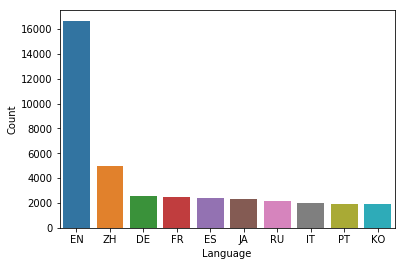

In [210]:
sns.barplot(x="Language", y="Count", data=languages.head(10));

English is the most popular language, only about 200 games doesn't have english transaltion. Based on this, we can conclude that english translation is an essential element of mobile strategy game. We can suggest that without it game could remain unnoticed and didn't achive any succses

In [211]:
#We are going to transform original Language feature into 2 new features: have english translation/ doesn't have english translation 
#& single/ multiple languages avaliable. After performing this original feature is going to be droped.
data['Eng_lng'] = 0
data['Single_lng'] = 0

data.loc[data['Languages'].str.contains('EN') == True,'Eng_lng'] = 1
data.loc[data['Languages'].str.len() == 2, 'Single_lng'] = 1

data = data.drop('Languages', axis = 1)

In [212]:
#to check if previous operation succeeded
#data[data['Eng_lng'] == 0]
#data[data['Single_lng'] == 0]

In [213]:
#transforming Price feature to nominal feature, where 0 is free-to-play game, and 1 is paid game
data.loc[data['Price'] == 0, 'Price'] = 0
data.loc[data['Price'] > 0, 'Price'] = 1

In [214]:
#Transforming In-app purchases to nominal feature, where 0 is purchases not avaliable and 1 is in-app purchases are avaliable
data['In-app Purchases'] = data['In-app Purchases'].fillna(0)
data.loc[data['In-app Purchases'] != 0, 'In-app Purchases'] = '1'

# Data Analysis

Now, after most of data cleaning are done we can try to analyse what are the trends in this category we can observe, based on our data, what game is best according to users and what factors have impact on this score. 

In [215]:
data['Release_Year'].value_counts().reset_index()

,index,Release_Year
0,2016,3099
1,2017,2793
2,2018,2484
3,2015,2190
4,2014,1876
5,2019,1552
6,2013,1150
7,2012,723
8,2011,483
9,2010,276


Text(0.5, 1.0, 'Amount of published games by Year')

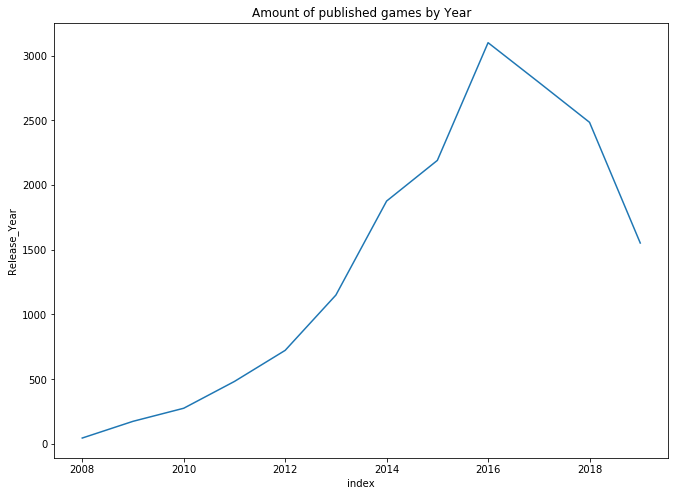

In [216]:
plt.figure(figsize=(11,8))
sns.lineplot(x=data['Release_Year'].value_counts().reset_index().iloc[:,0],
             y=data['Release_Year'].value_counts().reset_index().iloc[:,1]).set_title("Amount of published games by Year")

Text(0.5, 1.0, 'Amount of published games by Month')

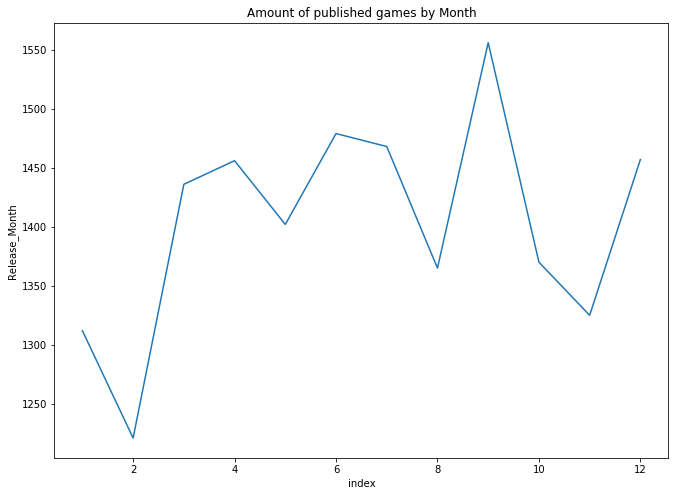

In [217]:
plt.figure(figsize=(11,8))
sns.lineplot(x=data['Release_Month'].value_counts().reset_index().iloc[:,0],
             y=data['Release_Month'].value_counts().reset_index().iloc[:,1]).set_title("Amount of published games by Month")

If we look on release date at monthly level, we can see that February is the lest popular month for release of application, while September is the most popular one.  

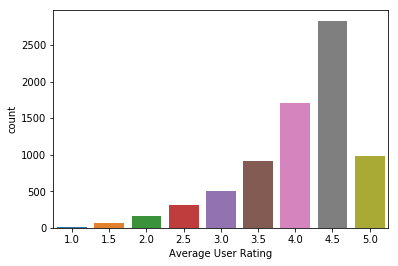

In [218]:
sns.countplot(data['Average User Rating'])

As we can see, majority of games got 4.5 average liking score, for applicatons that were evaluated (as we saw 9446 games didn't get any score from users)

In [219]:
data.groupby(['Release_Year'])['Average User Rating'].aggregate('mean')

Release_Year
2008    3.290698
2009    3.295322
2010    3.531496
2011    3.873464
2012    4.021044
2013    4.006053
2014    4.033228
2015    4.100568
2016    4.105187
2017    4.203027
2018    4.218925
2019    4.316068
Name: Average User Rating, dtype: float64

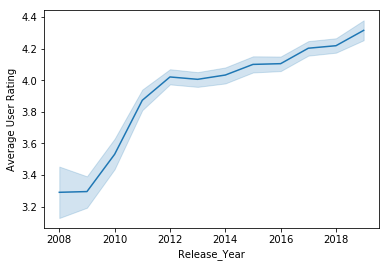

In [220]:
sns.lineplot(x=data['Release_Year'], y=data['Average User Rating'])

According to graph, average user rating is going up with years. We can suppose that new games getting better scores due to technology improvements (better graphics, updated game mechanics etc.)

In [221]:
data.groupby(['Release_Year'])['User Rating Count'].aggregate('mean')

Release_Year
2008    14807.953488
2009    15047.508772
2010     3334.334646
2011     2246.051597
2012     7639.016835
2013     2275.480630
2014     2593.495781
2015     1832.272727
2016     3609.543708
2017     2810.222338
2018     2404.731243
2019     1481.862579
Name: User Rating Count, dtype: float64

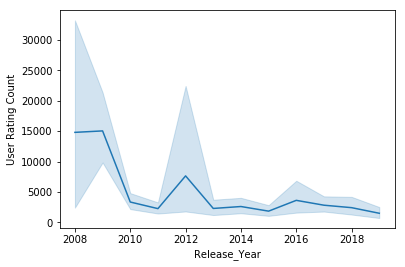

In [222]:
sns.lineplot(x=data['Release_Year'], y=data['User Rating Count'])

However, considering this data we can conclude that our last suggestion was wrong. Increase in average user rating score can be affected by decrease in amount of users that evaluated games. It means that games, that were published in last years, got better scores, probably, because less users evaluated them compared to games that were published earlier. 

In [223]:
data.groupby(['Release_Year'])['Price'].aggregate('mean')

Release_Year
2008    0.565217
2009    0.417143
2010    0.420290
2011    0.320911
2012    0.237898
2013    0.179130
2014    0.127399
2015    0.131050
2016    0.178445
2017    0.157895
2018    0.113124
2019    0.124346
Name: Price, dtype: float64

Text(0.5, 1.0, 'Single_lng')

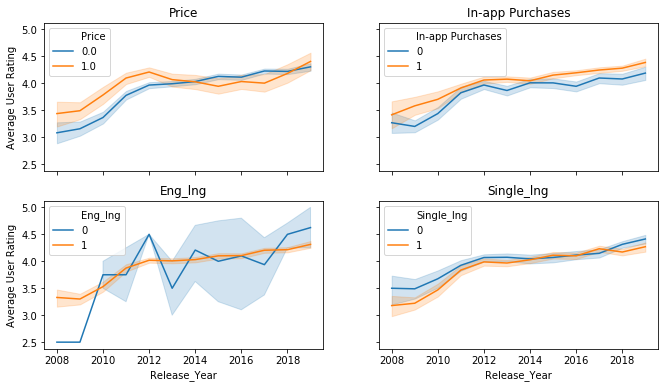

In [224]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(11, 6))
sns.lineplot(x=data['Release_Year'], y=data['Average User Rating'], hue=data['Price'], ax=axes[0, 0])
axes[0, 0].set_title('Price')
sns.lineplot(x=data['Release_Year'], y=data['Average User Rating'], hue=data['In-app Purchases'], ax=axes[0,1])
axes[0,1].set_title('In-app Purchases')
sns.lineplot(x=data['Release_Year'], y=data['Average User Rating'], hue=data['Eng_lng'], ax=axes[1,0])
axes[1, 0].set_title('Eng_lng')
sns.lineplot(x=data['Release_Year'], y=data['Average User Rating'], hue=data['Single_lng'], ax=axes[1, 1])
axes[1, 1].set_title('Single_lng')

We can cnclude that price-related and language-related features have same trend, so we can expect that those features have low impact on user rating of these applications. Only exception is games with no enghlish translation, but this could be affect of low amount of theese kind of games in a sample. 

<h2>Current state of mobile strategy games:</h2>
<li> 2016 was the most successful year for mobile games - over 3000 games was published this year. Which followed by small decline - 2800 games in 2017 and 2500 in 2018
<li> English translation is the essential feature for mobile games, over 98% of games have english translation
<li> Average user rating is going up with the years, but it doesn't clearly mean that quality of games or user expirience is also imporving, it is mosly affected by the fact that less users are tend to give their evaluation to games.    

# Successful games and developers

Now, when we have better understanding of processes that are going on in mobile strategy games category, we can found best performing game.

In [225]:
data.sort_values(by=['Average User Rating','User Rating Count'], ascending=False).head(10)

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,Release_Date,Release_Year,Release_Month,Eng_lng,Single_lng
12473,1270598321,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,0.0,1,Lion Studios,4,4.0,2019-07-12,2017-10-06,2017,10,1,1
6089,993492744,"Egg, Inc.",5.0,174591.0,0.0,1,"Auxbrain, Inc.",4,2.0,2019-07-25,2016-07-14,2016,7,1,1
14155,1375425432,AFK Arena,5.0,156766.0,0.0,1,Lilith Games,9,4.0,2019-07-30,2019-04-09,2019,4,1,0
8388,1106442030,South Park: Phone Destroyer\u2122,5.0,156044.0,0.0,1,Ubisoft,17,3.0,2019-07-23,2017-11-09,2017,11,1,0
13261,1321606577,From Zero to Hero: Cityman,5.0,146729.0,0.0,1,Heatherglade Ltd,12,4.0,2019-07-29,2017-12-21,2017,12,1,0
15266,1438089337,Sushi Bar Idle,5.0,123606.0,0.0,1,Green Panda Games,4,4.0,2019-07-01,2018-10-12,2018,10,1,1
10418,1181774280,Fire Emblem Heroes,5.0,120283.0,0.0,1,"Nintendo Co., Ltd.",12,4.0,2019-07-25,2017-02-02,2017,2,1,0
1649,563718995,Bloons TD 5,5.0,97776.0,1.0,1,Ninja Kiwi,9,3.0,2019-07-04,2012-11-15,2012,11,1,0
872,466284081,Naval Warfare,5.0,90214.0,0.0,1,Untapped,4,2.0,2016-06-02,2011-12-17,2011,12,1,0
16434,1459059300,Idle Roller Coaster,5.0,88855.0,0.0,1,Green Panda Games,4,4.0,2019-07-16,2019-04-09,2019,4,1,1


**As we can see, "Cash, Inc. Fame & Fortune Game" from Lion Studios is the best performing game in this category with 5.0 average user rating and over 374k users evaluted this game.  **

In [226]:
data.sort_values(by=['User Rating Count'], ascending=False).head(10)

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,Release_Date,Release_Year,Release_Month,Eng_lng,Single_lng
1378,529479190,Clash of Clans,4.5,3032734.0,0.0,1,Supercell,9,3.0,2019-06-20,2012-08-02,2012,8,1,0
7187,1053012308,Clash Royale,4.5,1277095.0,0.0,1,Supercell,9,3.0,2019-08-01,2016-03-02,2016,3,1,0
13414,1330123889,PUBG MOBILE,4.5,711409.0,0.0,1,Tencent Mobile International Limited,17,4.0,2019-06-12,2018-03-19,2018,3,1,0
1921,597986893,Plants vs. Zombies\u2122 2,4.5,469562.0,0.0,1,PopCap,9,3.0,2019-07-29,2013-08-15,2013,8,1,0
8139,1094591345,Pok\xe9mon GO,3.5,439776.0,0.0,1,"Niantic, Inc.",9,4.0,2019-08-02,2016-07-07,2016,7,1,0
2410,672150402,Boom Beach,4.5,400787.0,0.0,1,Supercell,9,4.0,2019-07-03,2014-03-26,2014,3,1,0
12473,1270598321,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,0.0,1,Lion Studios,4,4.0,2019-07-12,2017-10-06,2017,10,1,1
8632,1116645064,Idle Miner Tycoon: Cash Empire,4.5,283035.0,0.0,1,Kolibri Games GmbH,4,4.0,2019-07-31,2016-07-01,2016,7,1,0
38,297558390,TapDefense,3.5,273687.0,0.0,1,TapJoy,9,0.0,2012-12-05,2008-11-24,2008,11,1,1
3550,847985808,Star Wars\u2122: Commander,4.5,259030.0,0.0,1,NaturalMotion,9,3.0,2019-07-18,2014-08-21,2014,8,1,0


Despite the fact that Clash of Clans, Clash Royale and PUBG mobile didn't get the highest average score possbile, they got over 500 thousands users ratings, which makes them really successful in terms of involving users in game expirience. Also, its important to point out that Supercell is leading developer in terms of producing games with high users involvement rate.

In [227]:
#first we are sorting rows based on our conditions and then grouping them and finding the highest value in group. 
#First action is needed because idmax() is returning first highest value, if there is multiple values that fits our condition 
data = data.sort_values(by=['Average User Rating','User Rating Count'], ascending=False)
data.loc[data.groupby(['Release_Year'])['Average User Rating'].idxmax()]

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,Release_Date,Release_Year,Release_Month,Eng_lng,Single_lng
26,292421271,Fieldrunners,4.0,41869.0,1.0,1,"Subatomic Studios, LLC",9,2.0,2018-04-11,2008-10-05,2008,10,1,1
210,341288790,ShotTacToe,5.0,7.0,1.0,0,Phone Bros,17,0.0,2016-09-22,2009-12-01,2009,12,1,1
288,366161039,"""Eric's FreeCell Solitaire Pack HD""",5.0,1229.0,1.0,0,Eric Snider,4,1.0,2017-09-02,2010-12-10,2010,12,1,1
872,466284081,Naval Warfare,5.0,90214.0,0.0,1,Untapped,4,2.0,2016-06-02,2011-12-17,2011,12,1,0
1649,563718995,Bloons TD 5,5.0,97776.0,1.0,1,Ninja Kiwi,9,3.0,2019-07-04,2012-11-15,2012,11,1,0
1597,556362131,Naval Warfare Multi-shot,5.0,27804.0,0.0,1,Untapped,4,2.0,2016-06-06,2013-01-21,2013,1,1,0
4477,911117141,Bitcoin Billionaire,5.0,48776.0,0.0,1,Noodlecake Studios Inc,12,4.0,2019-03-06,2014-11-06,2014,11,1,1
7002,1045165396,Vlogger Go Viral - Tube Star,5.0,80407.0,0.0,1,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4,3.0,2019-07-24,2015-11-26,2015,11,1,0
6089,993492744,"Egg, Inc.",5.0,174591.0,0.0,1,"Auxbrain, Inc.",4,2.0,2019-07-25,2016-07-14,2016,7,1,1
12473,1270598321,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,0.0,1,Lion Studios,4,4.0,2019-07-12,2017-10-06,2017,10,1,1


We can see that Untapped studio was pretty successful in 2011 and 2013, their games were leading ones in these years.

In [228]:
data.loc[data.groupby(['Age Rating'])['Average User Rating'].idxmax()]

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,Release_Date,Release_Year,Release_Month,Eng_lng,Single_lng
12473,1270598321,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,0.0,1,Lion Studios,4,4.0,2019-07-12,2017-10-06,2017,10,1,1
14155,1375425432,AFK Arena,5.0,156766.0,0.0,1,Lilith Games,9,4.0,2019-07-30,2019-04-09,2019,4,1,0
13261,1321606577,From Zero to Hero: Cityman,5.0,146729.0,0.0,1,Heatherglade Ltd,12,4.0,2019-07-29,2017-12-21,2017,12,1,0
8388,1106442030,South Park: Phone Destroyer\u2122,5.0,156044.0,0.0,1,Ubisoft,17,3.0,2019-07-23,2017-11-09,2017,11,1,0


Its important to underline that there is no clear leader among different age rating groups. For instance, in 17+ age group most successful game in South Park

In [229]:
data.loc[data.groupby(['Price'])['Average User Rating'].idxmax()]

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,Release_Date,Release_Year,Release_Month,Eng_lng,Single_lng
12473,1270598321,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,0.0,1,Lion Studios,4,4.0,2019-07-12,2017-10-06,2017,10,1,1
1649,563718995,Bloons TD 5,5.0,97776.0,1.0,1,Ninja Kiwi,9,3.0,2019-07-04,2012-11-15,2012,11,1,0


Bloons TD 5 is the most successful game among all paid one

# Part 2. Machine learning

In [230]:
data.shape

(16847, 15)

In [231]:
#According to information from owner of dataset, for all games with less then 5 ratings is was replaced to NaN. We can replace it to 0
#For machine learning purposes we filling in all Nan values with 0
data.fillna(0, inplace = True)

In [232]:
data.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,Release_Date,Release_Year,Release_Month,Eng_lng,Single_lng
12473,1270598321,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,0.0,1,Lion Studios,4,4.0,2019-07-12,2017-10-06,2017,10,1,1
6089,993492744,"Egg, Inc.",5.0,174591.0,0.0,1,"Auxbrain, Inc.",4,2.0,2019-07-25,2016-07-14,2016,7,1,1
14155,1375425432,AFK Arena,5.0,156766.0,0.0,1,Lilith Games,9,4.0,2019-07-30,2019-04-09,2019,4,1,0
8388,1106442030,South Park: Phone Destroyer\u2122,5.0,156044.0,0.0,1,Ubisoft,17,3.0,2019-07-23,2017-11-09,2017,11,1,0
13261,1321606577,From Zero to Hero: Cityman,5.0,146729.0,0.0,1,Heatherglade Ltd,12,4.0,2019-07-29,2017-12-21,2017,12,1,0


In [233]:
data.corr()

,ID,Average User Rating,User Rating Count,Price,Age Rating,Size,Release_Year,Release_Month,Eng_lng,Single_lng
ID,1.000000,-0.296216,-0.044390,-0.124310,0.053447,0.255453,0.970700,-0.030159,-0.016132,0.112986
Average User Rating,-0.296216,1.000000,0.064012,-0.004543,0.165437,0.224065,-0.264309,0.014780,0.019432,-0.149794
User Rating Count,-0.044390,0.064012,1.000000,-0.010342,0.032454,0.038652,-0.041478,0.004797,0.004324,-0.050216
Price,-0.124310,-0.004543,-0.010342,1.000000,0.015864,0.009856,-0.124483,0.005838,0.015730,-0.000781
Age Rating,0.053447,0.165437,0.032454,0.015864,1.000000,0.335699,0.078540,0.000852,-0.016959,-0.053665
Size,0.255453,0.224065,0.038652,0.009856,0.335699,1.000000,0.293505,0.016973,0.009195,-0.044251
Release_Year,0.970700,-0.264309,-0.041478,-0.124483,0.078540,0.293505,1.000000,-0.152533,-0.013613,0.093048
Release_Month,-0.030159,0.014780,0.004797,0.005838,0.000852,0.016973,-0.152533,1.000000,-0.000014,-0.000959
Eng_lng,-0.016132,0.019432,0.004324,0.015730,-0.016959,0.009195,-0.013613,-0.000014,1.000000,0.038253
Single_lng,0.112986,-0.149794,-0.050216,-0.000781,-0.053665,-0.044251,0.093048,-0.000959,0.038253,1.000000


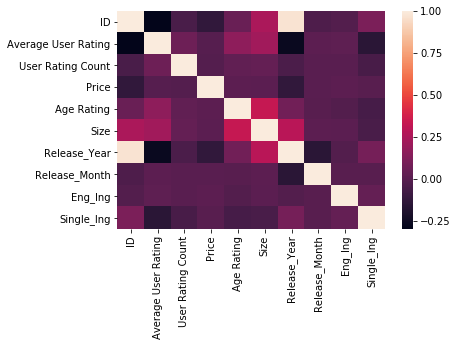

In [234]:
sns.heatmap(data.corr())

Based on correlation matrix we can't find clear patterns on what variables have impact on application rating

In [235]:
data.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,Release_Date,Release_Year,Release_Month,Eng_lng,Single_lng
12473,1270598321,"Cash, Inc. Fame & Fortune Game",5.0,374772.0,0.0,1,Lion Studios,4,4.0,2019-07-12,2017-10-06,2017,10,1,1
6089,993492744,"Egg, Inc.",5.0,174591.0,0.0,1,"Auxbrain, Inc.",4,2.0,2019-07-25,2016-07-14,2016,7,1,1
14155,1375425432,AFK Arena,5.0,156766.0,0.0,1,Lilith Games,9,4.0,2019-07-30,2019-04-09,2019,4,1,0
8388,1106442030,South Park: Phone Destroyer\u2122,5.0,156044.0,0.0,1,Ubisoft,17,3.0,2019-07-23,2017-11-09,2017,11,1,0
13261,1321606577,From Zero to Hero: Cityman,5.0,146729.0,0.0,1,Heatherglade Ltd,12,4.0,2019-07-29,2017-12-21,2017,12,1,0


In [236]:
#We are not including 'ID' in a analysis because its unique to each application thus it doesnt provide any predictive information.
df_x = data[['User Rating Count','Price','In-app Purchases','Age Rating','Size','Release_Year','Release_Month','Eng_lng','Single_lng']]
df_y = data['Average User Rating']

In [247]:
#Activating LinerRegression model, splitting data for train and test sets, fitting model on train data.
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.33, random_state=1)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
#Getting results on effectivness of resulting model
print('Train score: ', reg.score(x_train, y_train), '/n Test score:', reg.score(x_test, y_test))
print(np.sum(reg.coef_!=0))
print(reg.coef_)

Train score:  0.2249322365926931 /n Test score: 0.23975264292570042
9
[ 1.53019677e-06 -3.57640528e-02  8.82863000e-01  4.75070089e-02
  3.40527577e-01 -2.92595767e-01 -2.96142243e-02  2.69840093e-01
 -3.50769038e-01]


Basically, only 20% of users rating is explained by our model, this mean that majority of users scores is explained by other features that we don't have or didn't include in model

In [246]:
#prediction for testing set
y_pred_test = reg.predict(x_test)
print(np.sqrt(MSE(y_test, y_pred_test)))
prediction_results = pd.DataFrame({'Actual': y_test,'Predicted':y_pred_test}) 
prediction_results

#predicting for train set
y_pred_train = reg.predict(x_train)
print(np.sqrt(MSE(y_train, y_pred_train)))
prediction_results = pd.DataFrame({'Actual': y_train,'Predicted':y_pred_train}) 
prediction_results

1.8145220685376644
1.8302888285032748


,Actual,Predicted
10658,0.0,0.644661
15362,5.0,0.104904
7548,0.0,1.266848
594,4.5,4.623570
5544,0.0,0.833841
...,...,...
5327,0.0,0.887953
11453,0.0,1.292778
6387,0.0,1.941408
7969,0.0,0.913883


We can see that our model is predicting most of the values incorrectly and error is close to 2 points of user ratings

In [240]:
#checking coefficients for features that our model uses
featuresDF = pd.DataFrame(df_x.columns.values, columns=['Features'])
featuresDF['w'] = reg.coef_
featuresDF

,Features,w
0,User Rating Count,0.000001
1,Price,-0.058872
2,In-app Purchases,0.866528
3,Age Rating,0.045483
4,Size,0.349264
5,Release_Year,-0.296278
6,Release_Month,-0.027056
7,Eng_lng,0.210664
8,Single_lng,-0.380022


As a result we applied linear regression in order to predict users score for application, however this model is pretty bad. There is several reasons for this:
1. Non-technical. 
    Features, that we are using, are telling us almost nothing about users expirince inside the game, so its really hard to explain why users gave this or another score to a game. 
2. Technical (and those can be used to improve model):
    * Average User Rating is not distributed normaly, its skewed to right side. Normalizing this could imporove the results. 
    * What I've learned from other users, who did similar analysis on this dataset, - we could perform different kind of features engineering. 
        * Text features like "Name, Description" can be transofmed into a number that shows amount of symbols in these strings.
        * Text features like 'Genres, Developer, Language' we can use LabelEncoding instead of dropping these features out. Amount of Lenguages and Genres also could be calculated.
        * Difference between Release date and Current version date could be calcluated as amount of days that app was supported and recieved an updates. 
        * Difference between Current version data and date of first publishing dataset could be transormed to a feature that shows how many days left since last update. 
